In [1]:
!pip install bt

In [2]:
import bt #백테스팅
import yfinance as yf
import pandas as pd

In [3]:
# 백테스팅 날짜 선정
start = '2010-01-01'
end = '2024-01-01'

### 종목선정

`산업군별 대표 ETF`

- XLV: Healthcare Select Sector SPDR (헬스케어)

- XLU: Utilities Select Sector SPDR (유틸리티)

- XLP: Consumer Staples Select Sector SPDR (필수소비재)

- VNQ: Vanguard Real Estate ETF (부동산)

[*********************100%***********************]  4 of 4 completed
100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Stat                 Stable Portfolio
-------------------  ------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         304.47%
Daily Sharpe         0.74
Daily Sortino        1.16
CAGR                 10.51%
Max Drawdown         -32.44%
Calmar Ratio         0.32

MTD                  4.44%
3m                   8.91%
6m                   3.07%
YTD                  1.16%
1Y                   0.55%
3Y (ann.)            6.06%
5Y (ann.)            9.25%
10Y (ann.)           9.02%
Since Incep. (ann.)  10.51%

Daily Sharpe         0.74
Daily Sortino        1.16
Daily Mean (ann.)    11.13%
Daily Vol (ann.)     15.01%
Daily Skew           -0.49
Daily Kurt           16.68
Best Day             8.22%
Worst Day            -11.29%

Monthly Sharpe       0.91
Monthly Sortino      1.71
Monthly Mean (ann.)  11.05%
Monthly Vol (ann.)   12.09%
Monthly Skew         -0.32
Monthly Kurt         0.09
Best Month           9.66%
Worst Month  

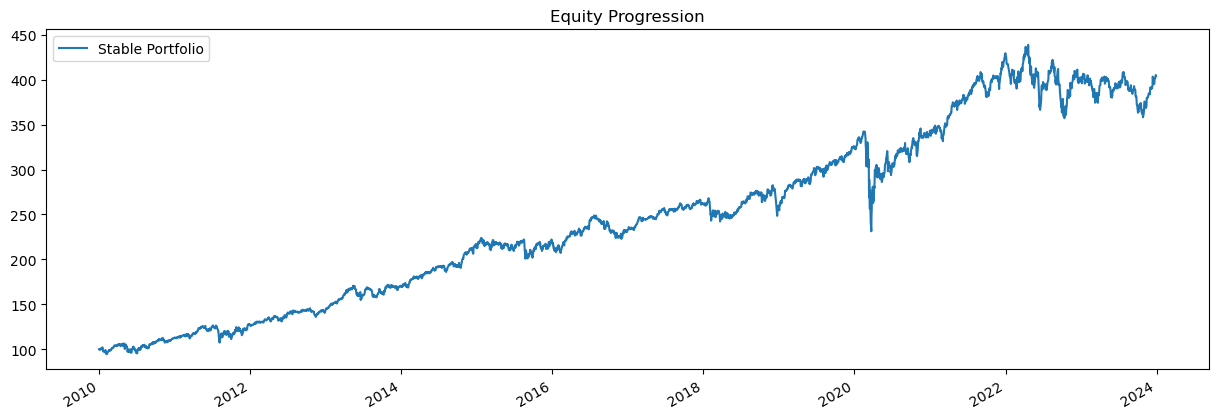

In [26]:
import yfinance as yf
import bt

# ETF 목록
tickers = ['XLV', 'XLU', 'XLP', 'VNQ']

# 데이터 다운로드
df = yf.download(tickers, start="2010-01-01", end="2024-01-01")['Adj Close']

# 백테스트 실행
strategy = bt.Strategy(
    'Stable Portfolio',
    [bt.algos.RunOnce(),
     bt.algos.SelectAll(),
     bt.algos.WeighEqually(),
     bt.algos.Rebalance()]
)
backtest = bt.Backtest(strategy, df)
result = bt.run(backtest)

# 결과 출력
result.plot()
result.display()

## Risk Parity (위험 균등화) 전략 사용

- 자산군별로 변동성을 고려해 위험이 동일하도록 비중 조정
- 안정적 수익률을 목표로 함

[계산 예시]


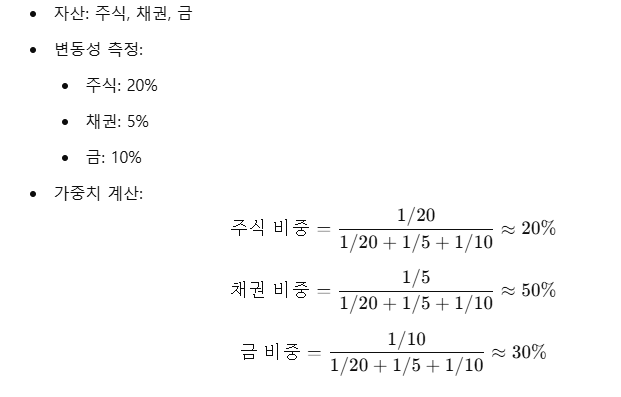

[*********************100%***********************]  4 of 4 completed
100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Stat                 Risk Parity
-------------------  -------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         319.29%
Daily Sharpe         0.77
Daily Sortino        1.21
CAGR                 10.79%
Max Drawdown         -31.66%
Calmar Ratio         0.34

MTD                  4.29%
3m                   9.09%
6m                   2.82%
YTD                  1.17%
1Y                   0.54%
3Y (ann.)            6.16%
5Y (ann.)            9.58%
10Y (ann.)           9.29%
Since Incep. (ann.)  10.79%

Daily Sharpe         0.77
Daily Sortino        1.21
Daily Mean (ann.)    11.35%
Daily Vol (ann.)     14.72%
Daily Skew           -0.44
Daily Kurt           16.56
Best Day             8.37%
Worst Day            -10.79%

Monthly Sharpe       0.95
Monthly Sortino      1.79
Monthly Mean (ann.)  11.27%
Monthly Vol (ann.)   11.89%
Monthly Skew         -0.32
Monthly Kurt         0.15
Best Month           9.76%
Worst Month          -8

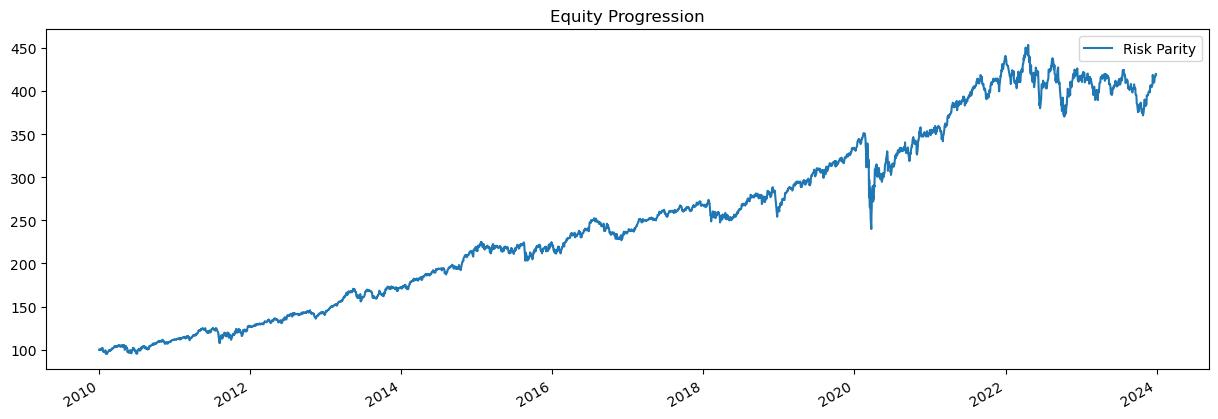

In [27]:
import yfinance as yf
import bt
import numpy as np

# Risk Parity 전략의 사용자 정의 가중치 알고리즘
class RiskParityWeights(bt.Algo):
    def __init__(self, data):
        self.data = data
    
    def __call__(self, target):
        if not target.temp['selected']:
            return False
        
        # 변동성 역수를 기반으로 가중치 계산
        std_dev = self.data[target.temp['selected']].pct_change().std()
        weights = 1 / std_dev
        weights = weights / weights.sum()
        
        # 가중치 적용
        target.temp['weights'] = weights.to_dict()
        return True

# ETF 목록
tickers = ['XLV', 'XLU', 'XLP', 'VNQ']

# 데이터 다운로드
data = yf.download(tickers, start="2010-01-01", end="2024-01-01")['Adj Close']

# Risk Parity 전략 정의
strategy = bt.Strategy(
    'Risk Parity',
    [
        bt.algos.RunMonthly(),           # 매월 실행
        bt.algos.SelectAll(),            # 모든 자산 선택
        RiskParityWeights(data),         # 사용자 정의 위험 균등 가중치
        bt.algos.Rebalance()             # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest = bt.Backtest(strategy, data)
result = bt.run(backtest)

# 결과 출력
result.plot()
result.display()

100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


Stat                 Risk Parity (Quarterly)
-------------------  -------------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         315.29%
Daily Sharpe         0.77
Daily Sortino        1.20
CAGR                 10.72%
Max Drawdown         -31.77%
Calmar Ratio         0.34

MTD                  4.30%
3m                   9.10%
6m                   2.85%
YTD                  1.04%
1Y                   0.43%
3Y (ann.)            6.06%
5Y (ann.)            9.48%
10Y (ann.)           9.20%
Since Incep. (ann.)  10.72%

Daily Sharpe         0.77
Daily Sortino        1.20
Daily Mean (ann.)    11.28%
Daily Vol (ann.)     14.74%
Daily Skew           -0.45
Daily Kurt           16.72
Best Day             8.44%
Worst Day            -10.82%

Monthly Sharpe       0.94
Monthly Sortino      1.77
Monthly Mean (ann.)  11.20%
Monthly Vol (ann.)   11.89%
Monthly Skew         -0.33
Monthly Kurt         0.16
Best Month           9.75%

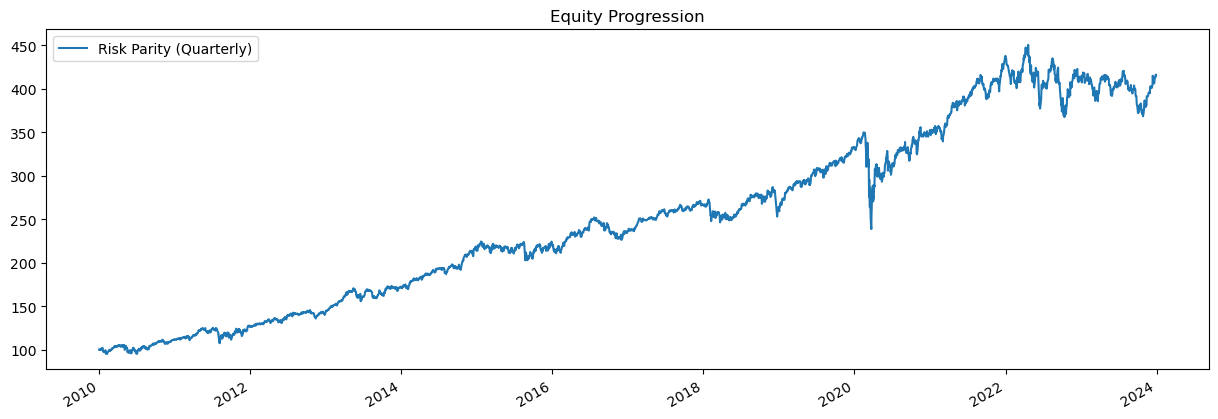

In [28]:
# Risk Parity 전략 정의 - 분기별 리밸런싱
strategy_quarterly = bt.Strategy(
    'Risk Parity (Quarterly)',
    [
        bt.algos.RunQuarterly(),        # 분기별 리밸런싱 실행
        bt.algos.SelectAll(),           # 모든 자산 선택
        RiskParityWeights(data),        # 사용자 정의 위험 균등 가중치
        bt.algos.Rebalance()            # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest_quarterly = bt.Backtest(strategy_quarterly, data)
result_quarterly = bt.run(backtest_quarterly)

# 결과 출력
result_quarterly.plot()
result_quarterly.display()

100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Stat                 Momentum Risk Parity
-------------------  ----------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         319.89%
Daily Sharpe         0.77
Daily Sortino        1.21
CAGR                 10.80%
Max Drawdown         -31.63%
Calmar Ratio         0.34

MTD                  4.28%
3m                   9.07%
6m                   2.82%
YTD                  1.16%
1Y                   0.54%
3Y (ann.)            6.17%
5Y (ann.)            9.59%
10Y (ann.)           9.30%
Since Incep. (ann.)  10.80%

Daily Sharpe         0.77
Daily Sortino        1.21
Daily Mean (ann.)    11.35%
Daily Vol (ann.)     14.72%
Daily Skew           -0.44
Daily Kurt           16.54
Best Day             8.37%
Worst Day            -10.77%

Monthly Sharpe       0.95
Monthly Sortino      1.79
Monthly Mean (ann.)  11.28%
Monthly Vol (ann.)   11.88%
Monthly Skew         -0.32
Monthly Kurt         0.14
Best Month           9.75%
Worst

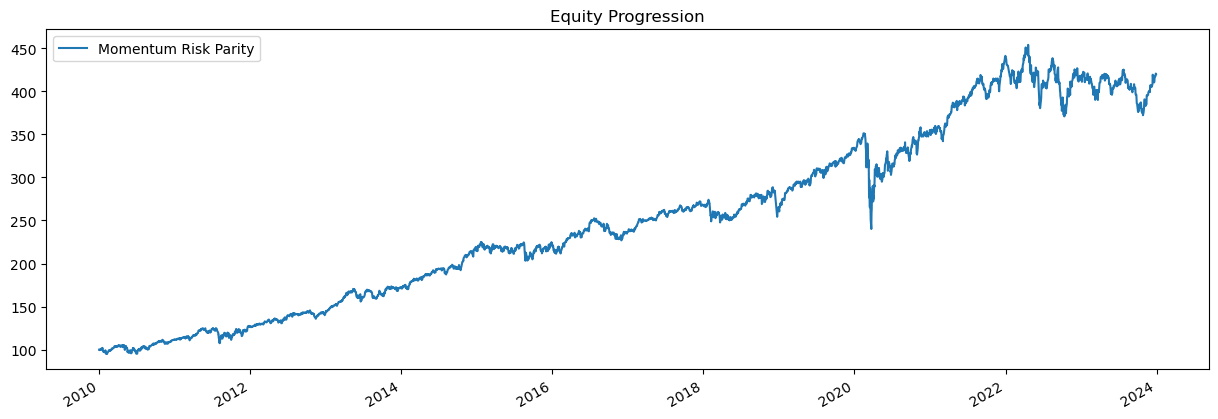

In [29]:
class MomentumRiskParityWeights(bt.Algo):
    def __init__(self, data, momentum_window=126):
        self.data = data
        self.momentum_window = momentum_window

    def __call__(self, target):
        if not target.temp['selected']:
            return False
        
        # 변동성 계산
        std_dev = self.data[target.temp['selected']].pct_change().std()
        
        # 모멘텀 계산 (최근 momentum_window 기간의 수익률)
        momentum = self.data[target.temp['selected']].pct_change(self.momentum_window).mean()

        # 가중치 계산 (변동성 역수 * 모멘텀)
        weights = (1 / std_dev) * (1 + momentum)
        weights = weights / weights.sum()
        
        # 가중치 적용
        target.temp['weights'] = weights.to_dict()
        return True

# Risk Parity + Momentum 전략 정의
strategy_momentum = bt.Strategy(
    'Momentum Risk Parity',
    [
        bt.algos.RunMonthly(),                    # 매월 실행
        bt.algos.SelectAll(),                     # 모든 자산 선택
        MomentumRiskParityWeights(data),          # 모멘텀 기반 위험 균등 가중치
        bt.algos.Rebalance()                      # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest_momentum = bt.Backtest(strategy_momentum, data)
result_momentum = bt.run(backtest_momentum)

# 결과 출력
result_momentum.plot()
result_momentum.display()

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Stat                 Capped Risk Parity
-------------------  --------------------
Start                2010-01-03
End                  2023-12-29
Risk-free rate       0.00%

Total Return         319.29%
Daily Sharpe         0.77
Daily Sortino        1.21
CAGR                 10.79%
Max Drawdown         -31.66%
Calmar Ratio         0.34

MTD                  4.29%
3m                   9.09%
6m                   2.82%
YTD                  1.17%
1Y                   0.54%
3Y (ann.)            6.16%
5Y (ann.)            9.58%
10Y (ann.)           9.29%
Since Incep. (ann.)  10.79%

Daily Sharpe         0.77
Daily Sortino        1.21
Daily Mean (ann.)    11.35%
Daily Vol (ann.)     14.72%
Daily Skew           -0.44
Daily Kurt           16.56
Best Day             8.37%
Worst Day            -10.79%

Monthly Sharpe       0.95
Monthly Sortino      1.79
Monthly Mean (ann.)  11.27%
Monthly Vol (ann.)   11.89%
Monthly Skew         -0.32
Monthly Kurt         0.15
Best Month           9.76%
Worst Mon

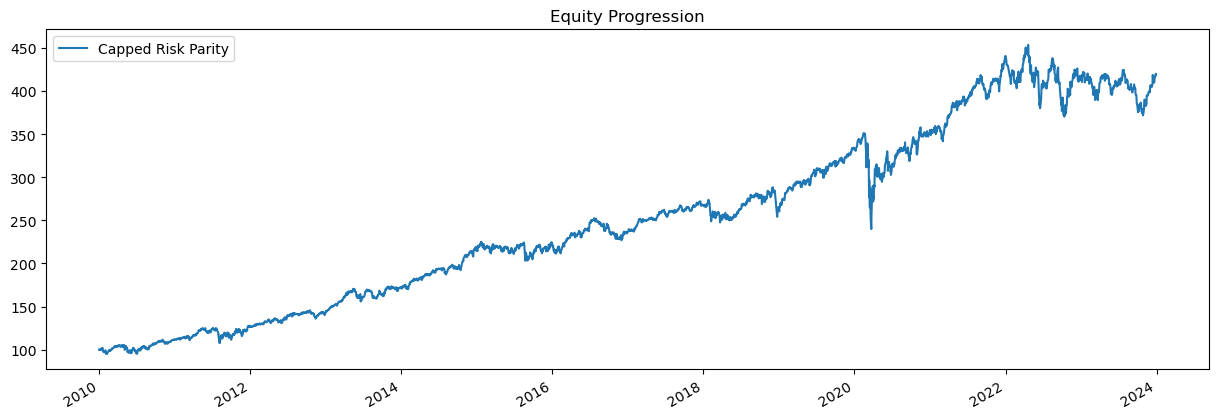

In [30]:
class CappedRiskParityWeights(bt.Algo):
    def __init__(self, data, max_weight=0.4, min_weight=0.05):
        self.data = data
        self.max_weight = max_weight
        self.min_weight = min_weight

    def __call__(self, target):
        if not target.temp['selected']:
            return False
        
        # 변동성 계산
        std_dev = self.data[target.temp['selected']].pct_change().std()
        weights = 1 / std_dev
        weights = weights / weights.sum()
        
        # 가중치 상한선 및 하한선 적용
        weights = weights.clip(lower=self.min_weight, upper=self.max_weight)
        weights = weights / weights.sum()  # 다시 정규화

        # 가중치 적용
        target.temp['weights'] = weights.to_dict()
        return True

# Risk Parity + 가중치 제한 전략 정의
strategy_capped = bt.Strategy(
    'Capped Risk Parity',
    [
        bt.algos.RunMonthly(),                 # 매월 실행
        bt.algos.SelectAll(),                  # 모든 자산 선택
        CappedRiskParityWeights(data),         # 상한/하한 적용 가중치
        bt.algos.Rebalance()                   # 리밸런싱 실행
    ]
)

# 백테스트 실행
backtest_capped = bt.Backtest(strategy_capped, data)
result_capped = bt.run(backtest_capped)

# 결과 출력
result_capped.plot()
result_capped.display()

### 전략 비교

In [31]:
# 백테스트 실행
backtests = {
    "Risk Parity (Monthly)": bt.Backtest(strategy, data),
    "Risk Parity (Quarterly)": bt.Backtest(strategy_quarterly, data),
    "Momentum Risk Parity": bt.Backtest(strategy_momentum, data),
    "Capped Risk Parity": bt.Backtest(strategy_capped, data)
}

# 모든 백테스트 실행
results = bt.run(*backtests.values())

100%|██████████| 4/4 [00:09<00:00,  2.49s/it]


In [ ]:
# 결과 요약 출력
results.display()

# 개별 전략의 성과 지표 정리
# 결과를 데이터프레임으로 변환
import pandas as pd

comparison = pd.DataFrame({
    name: {
        "CAGR": backtest.stats['cagr'],
        "Max Drawdown": backtest.stats['max_drawdown'],
        "Sharpe Ratio": backtest.stats['daily_sharpe']
    }
    for name, backtest in backtests.items()
}).T

Stat                 Risk Parity    Risk Parity (Quarterly)    Momentum Risk Parity    Capped Risk Parity
-------------------  -------------  -------------------------  ----------------------  --------------------
Start                2010-01-03     2010-01-03                 2010-01-03              2010-01-03
End                  2023-12-29     2023-12-29                 2023-12-29              2023-12-29
Risk-free rate       0.00%          0.00%                      0.00%                   0.00%

Total Return         319.29%        315.29%                    319.89%                 319.29%
Daily Sharpe         0.77           0.77                       0.77                    0.77
Daily Sortino        1.21           1.20                       1.21                    1.21
CAGR                 10.79%         10.72%                     10.80%                  10.79%
Max Drawdown         -31.66%        -31.77%                    -31.63%                 -31.66%
Calmar Ratio         0.34   

TypeError: 'PerformanceStats' object is not subscriptable

<AxesSubplot:title={'center':"Comparison of Strategies' Cumulative Returns"}>

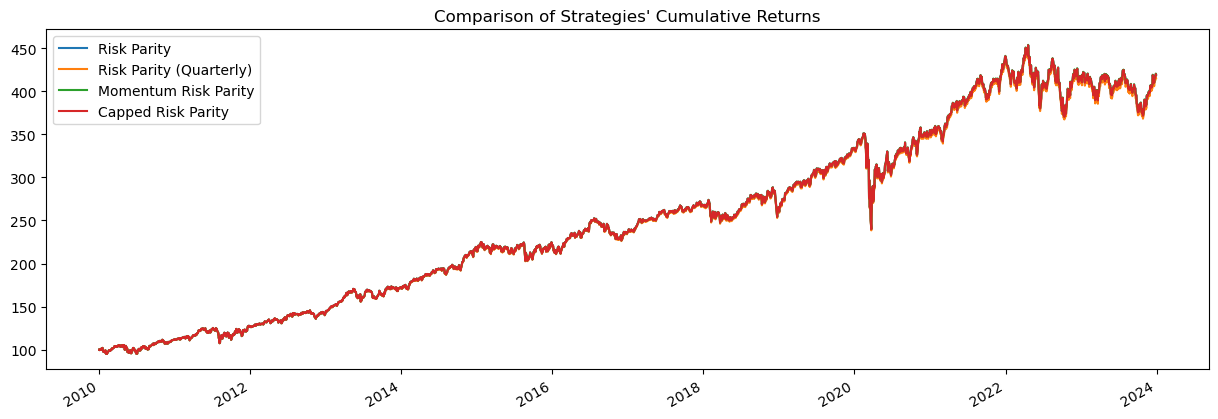

In [34]:
# 누적 수익률 비교 그래프
results.plot(title="Comparison of Strategies' Cumulative Returns")

### 벤치마크 비교

- 전략의 성과를 시장 벤치마크(예: S&P 500 ETF SPY 또는 MSCI World Index)와 비교.

- 목적: 전략이 시장 대비 얼마나 초과 수익을 창출했는지 평가.

In [ ]:
# 벤치마크 데이터 다운로드
benchmark_data = yf.download("SPY", start="2010-01-01", end="2024-01-01")["Adj Close"]

# DataFrame으로 변환
benchmark_data = benchmark_data.to_frame(name="SPY")

# 벤치마크 전략 정의
benchmark = bt.Strategy(
    'Benchmark (SPY)',
    [
        bt.algos.RunMonthly(),                   # 매월 실행
        bt.algos.SelectAll(),                    # SPY 선택
        bt.algos.WeighEqually(),                 # 동일 비중
        bt.algos.Rebalance()                     # 리밸런싱 실행
    ]
)

# 벤치마크 백테스트 실행
benchmark_backtest = bt.Backtest(benchmark, benchmark_data)

# 기존 전략과 벤치마크 비교 실행
results_with_benchmark = bt.run(*backtests.values(), benchmark_backtest)

# 결과 출력
results_with_benchmark.plot(title="Strategies vs. Benchmark (SPY)")
results_with_benchmark.display()

[*********************100%***********************]  1 of 1 completed


AttributeError: 'DataFrame' object has no attribute 'to_frame'